<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/1_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import optimize as opt, linalg as la

def gram_schmidt(A):
  A = A.astype("float64")
  V = np.copy(A.astype("float64"))
  U = np.zeros(A.shape)
  U[:, 0] = A[:, 0] / la.norm(A[:, 0])

  for k in range(1, V.shape[1]):

        u_k = A[:, k]

        for j in range(k):
            u_k -= (( np.dot(V[:, j], A[:, k]) / np.dot(V[:, j], V[:, j]) ) * V[:, j])

        V[:, k] = u_k

        U[:, k] = V[:, k] / la.norm(V[:, k])

  return U

**1.3.1 QR Decomposition** - Procedure to solve linear least squares problems, using the Gram-Scmidt alogrithm to obtain an orthonormal basis span from a linearly independent set of vectors spanning a space. This breaks a matrix, A, down into two matrices, Q and R, where Q is orthogonal and R is an upper right triangular matrix. Hence the name QR Decomposition.

In [51]:
def QR_Decomp(A):
  Q = gram_schmidt(A)

  R = np.zeros(A.shape)
  for row in range(A.shape[0]):
    for col in range(row, A.shape[0]):
      R[row, col] = np.dot(A[:, col], Q[:, row])

  return Q, R

A = np.random.randint(0, 100, [3, 3])
print(A, "\n")

Q_A, R_A = QR_Decomp(A)
print(Q_A, "\n\n", R_A, "\n")

print(np.round(np.dot(Q_A, Q_A.T), 5), "\n\n", np.dot(Q_A, R_A))

[[21 58 84]
 [11 13 18]
 [ 3 21 54]] 

[[ 0.87882265  0.27376566 -0.39079805]
 [ 0.46033567 -0.70196105  0.54345354]
 [ 0.12554609  0.65749756  0.74292337]] 

 [[23.89560629 59.59254529 88.88663356]
 [ 0.         20.56036348 45.86588488]
 [ 0.          0.         17.07298975]] 

[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]] 

 [[21. 58. 84.]
 [11. 13. 18.]
 [ 3. 21. 54.]]


**1.3.2 Least-Squares** - In over-determined systems, where there are more rows than columns, we can use Least-Squares to approximate the solution to A**x** = **b**, where A is a n×m matrix, **x** is the coefficient matrix and **b** is the solution vector to be approximated by A**x**.

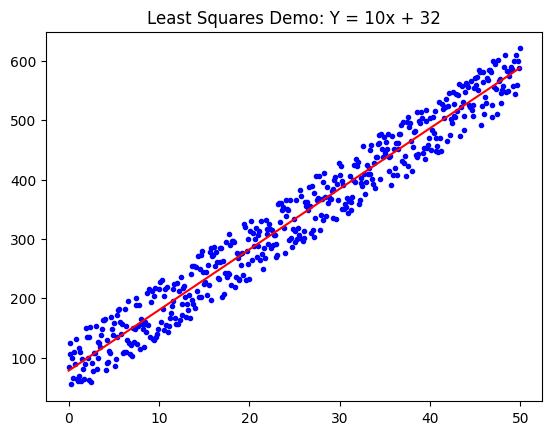

In [121]:
X = np.arange(0, 50, 0.1)
y_b = np.random.randint(0, 50)
y_m = np.random.randint(0, 25)
Y = y_b + (y_m * X) + (np.random.random(len(X)) * 100)

def least_squares(X, Y):
  x = np.vstack([X, np.ones(len(X))]).T
  y = Y[:, np.newaxis]

  p_inv = la.pinv(x)
  y_params = np.dot(p_inv, y)

  return round(y_params[0][0], 3), round(y_params[1][0], 3)

ls_m, ls_b = least_squares(X, Y)
plt.plot(X, Y, "b.")
plt.title("Least Squares Demo: Y = " + str(y_m) + "x + " + str(y_b))
plt.plot(X, (X*ls_m + ls_b), "r")
plt.show()

**1.3.3 Linear Regression** - Linear Regression is a model that assumes we can find coefficients, **β**, to data points that minimize the difference between the given y values and the predicted y values. This turns the problem into the least squares problem.

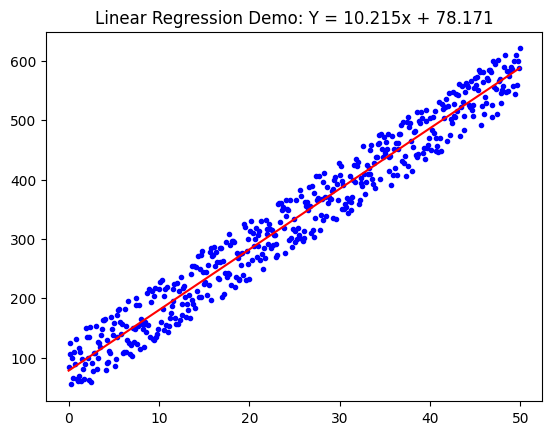

In [123]:
def lin_reg(X, Y):
  x_avg = np.mean(X)
  y_avg = np.mean(Y)
  s_x = X - x_avg
  s_xx = np.sum(s_x * s_x)
  s_xy = np.dot((s_x), (Y-y_avg))
  slope = s_xy / s_xx
  intercept = y_avg - slope * x_avg
  return round(slope, 3), round(intercept, 3)

lr_m, lr_b = lin_reg(X, Y)
plt.plot(X, Y, "b.")
plt.title("Linear Regression Demo: Y = " + str(lr_m) + "x + " + str(lr_b))
plt.plot(X, (X*lr_m + lr_b), "r")
plt.show()